In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
my_base_path = "" #<add path where day.csv is located>
pd_bike = pd.read_csv(my_base_path + "day.csv",parse_dates = ['dteday'])
pd_bike.shape

(730, 16)

In [3]:
pd_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [4]:
#Find out categorical variables
for each_column in pd_bike:
    print(each_column , len(pd_bike[each_column].unique()))

instant 730
dteday 730
season 4
yr 2
mnth 12
holiday 2
weekday 7
workingday 2
weathersit 3
temp 498
atemp 689
hum 594
windspeed 649
casual 605
registered 678
cnt 695


In [5]:
#Lets analyze considering this as time series data ; meaning readings for a day might not be available beforehand
#Shift target column by 1 place up
pd_bike['cnt'] = pd_bike['cnt'].shift(-1)
# Also weekday, working day and holiday information is also available in advance
pd_bike['weekday'] = pd_bike['weekday'].shift(-1)
pd_bike['workingday'] = pd_bike['workingday'].shift(-1)
pd_bike['holiday'] = pd_bike['holiday'].shift(-1)

In [6]:
pd_bike = pd_bike.dropna(how='any',axis=0)

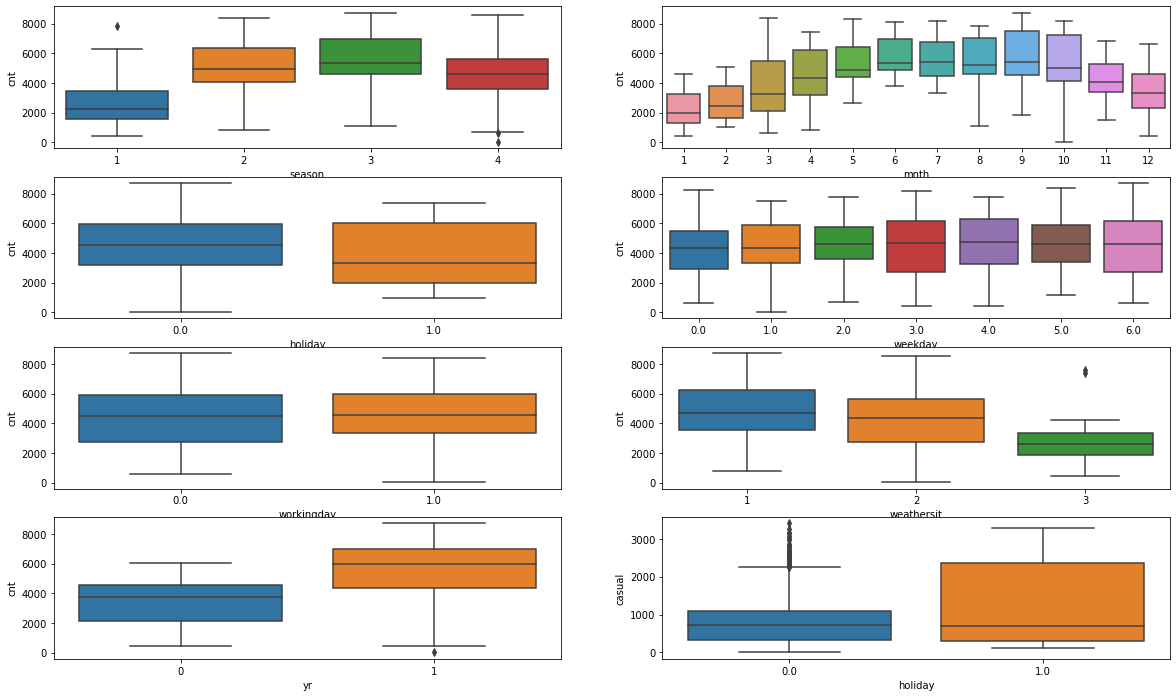

In [7]:
#Plot categorical variables against target and with registered/casual as relevant
plt.figure(figsize=(20,12))
plt.subplot(4,2,1)
sns.boxplot(x = 'season' , y = 'cnt' ,data = pd_bike)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth' , y = 'cnt' ,data = pd_bike)
plt.subplot(4,2,3)
sns.boxplot(x = 'holiday' , y = 'cnt' ,data = pd_bike)
plt.subplot(4,2,4)
sns.boxplot(x = 'weekday' , y = 'cnt' ,data = pd_bike)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday' , y = 'cnt' ,data = pd_bike)
plt.subplot(4,2,6)
sns.boxplot(x = 'weathersit' , y = 'cnt' ,data = pd_bike)
plt.subplot(4,2,7)
sns.boxplot(x = 'yr' , y = 'cnt' ,data = pd_bike)
plt.subplot(4,2,8)
sns.boxplot(x = 'holiday' , y = 'casual' ,data = pd_bike)
plt.show() 


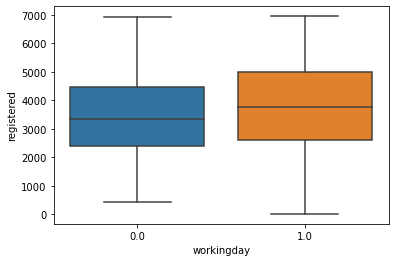

In [8]:
sns.boxplot(x = 'workingday' , y = 'registered' ,data = pd_bike)
plt.show() 

------------------------------------------------------


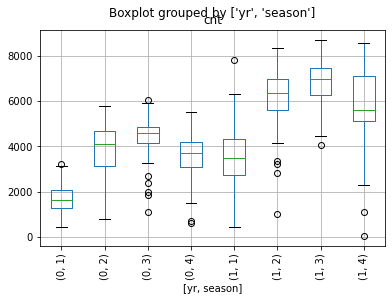

------------------------------------------------------
------------------------------------------------------


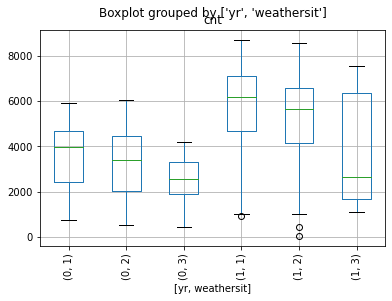

------------------------------------------------------
------------------------------------------------------


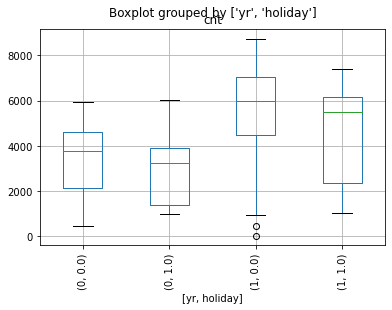

------------------------------------------------------
------------------------------------------------------


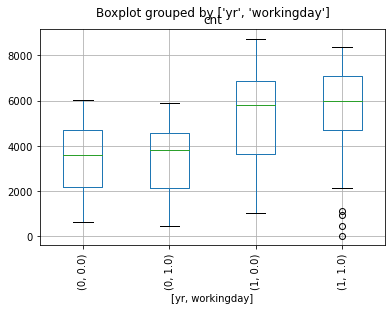

------------------------------------------------------
------------------------------------------------------


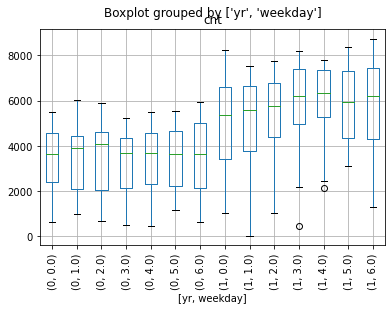

------------------------------------------------------
------------------------------------------------------


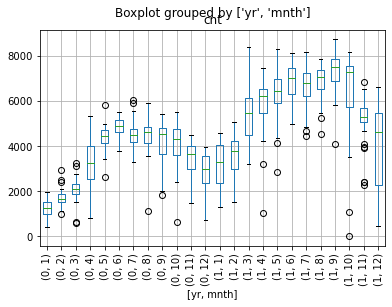

------------------------------------------------------
------------------------------------------------------


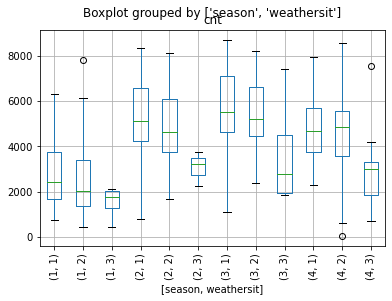

------------------------------------------------------
------------------------------------------------------


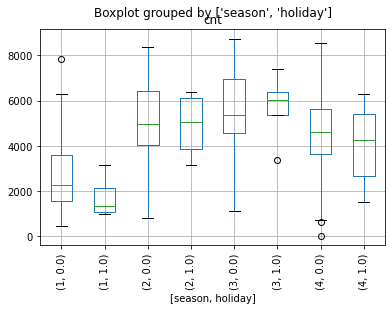

------------------------------------------------------
------------------------------------------------------


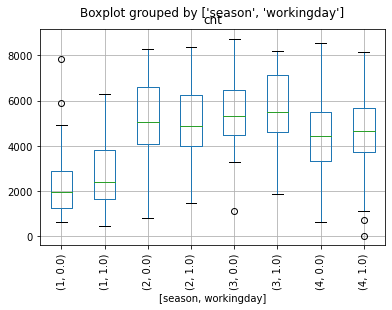

------------------------------------------------------
------------------------------------------------------


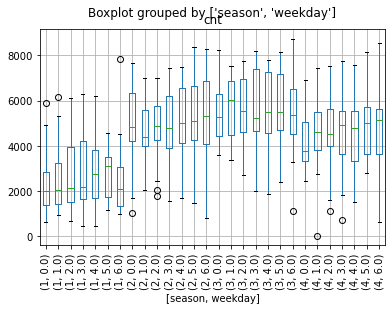

------------------------------------------------------
------------------------------------------------------


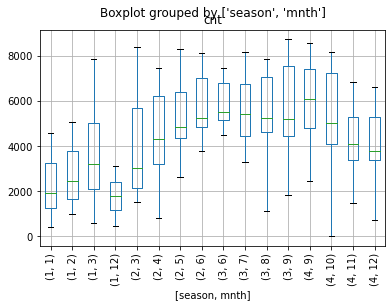

------------------------------------------------------
------------------------------------------------------


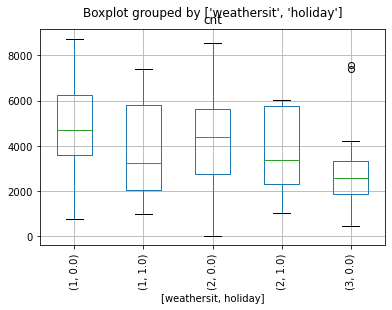

------------------------------------------------------
------------------------------------------------------


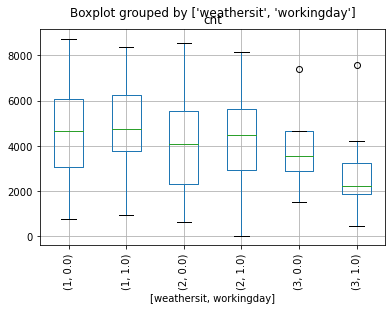

------------------------------------------------------
------------------------------------------------------


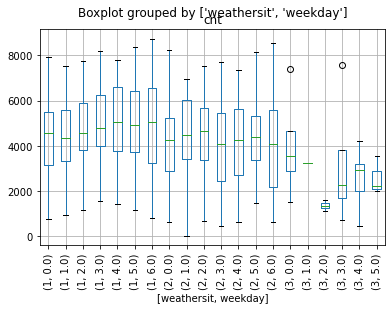

------------------------------------------------------
------------------------------------------------------


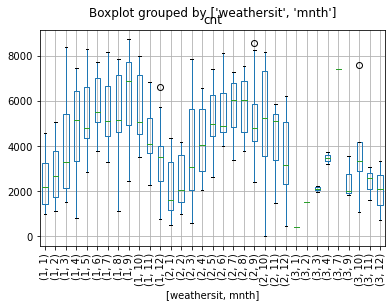

------------------------------------------------------


In [9]:
#Bivariate Analysis of categorical variables such that number of categories are managable and relevant
lst_categories = ['yr','season' ,'weathersit','holiday','workingday','weekday', 'mnth']
for i, eachCategory1 in enumerate(lst_categories):
    for j, eachCategory2 in enumerate(lst_categories):
        if j<=i or i > 2:
            continue
        print('------------------------------------------------------')
        pd_bike.boxplot(column='cnt' ,by=[eachCategory1,eachCategory2] , rot = 90, )
        plt.show() 
        print('------------------------------------------------------')

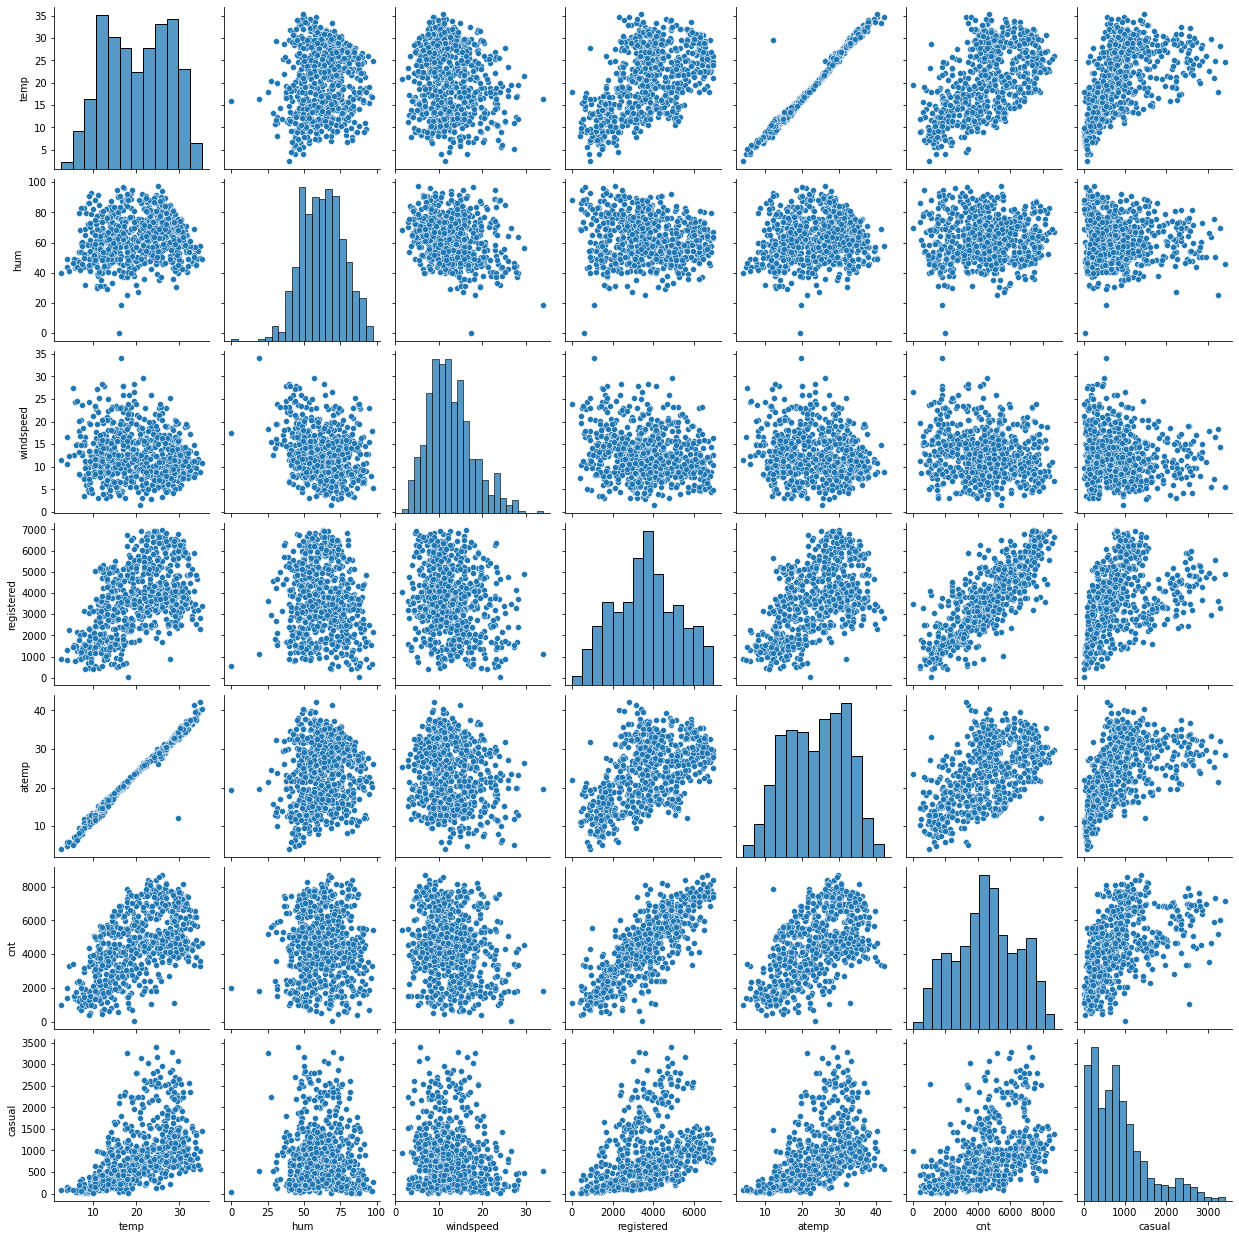

In [10]:
#Plot numeric variables 
numeric_vars = ['temp','hum','windspeed','registered','atemp','cnt','casual']
sns.pairplot(pd_bike[numeric_vars])
plt.show()

<AxesSubplot:>

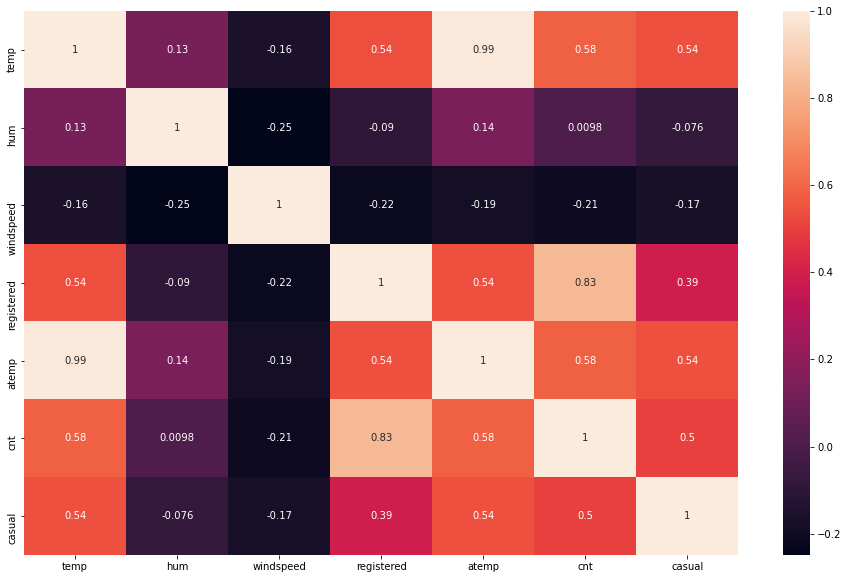

In [11]:
plt.figure(figsize= (16,10))
sns.heatmap(pd_bike[numeric_vars].corr(),annot = True)

In [12]:
#instant is record index column according to data dictionary, drop it , as it doesnt help in linear regression objective
#dteday is Date column and will not aid in linear regresion 
pd_bike.drop(['instant' ,'dteday'], axis =1 , inplace = True)
pd_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 728
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      729 non-null    int64  
 1   yr          729 non-null    int64  
 2   mnth        729 non-null    int64  
 3   holiday     729 non-null    float64
 4   weekday     729 non-null    float64
 5   workingday  729 non-null    float64
 6   weathersit  729 non-null    int64  
 7   temp        729 non-null    float64
 8   atemp       729 non-null    float64
 9   hum         729 non-null    float64
 10  windspeed   729 non-null    float64
 11  casual      729 non-null    int64  
 12  registered  729 non-null    int64  
 13  cnt         729 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 105.4 KB


In [13]:
#conversion using dummy encoding and add results to original
status = pd.get_dummies(pd_bike['season'],prefix = 'season' ,drop_first = True)
pd_bike = pd.concat([pd_bike,status], axis = 1)
pd_bike.drop('season',axis =1 , inplace = True)
pd_bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4
0,0,1,0.0,0.0,0.0,2,14.110847,18.18125,80.5833,10.749882,331,654,801.0,0,0,0
1,0,1,0.0,1.0,1.0,2,14.902598,17.68695,69.6087,16.652113,131,670,1349.0,0,0,0
2,0,1,0.0,2.0,1.0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1562.0,0,0,0
3,0,1,0.0,3.0,1.0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1600.0,0,0,0
4,0,1,0.0,4.0,1.0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1606.0,0,0,0


In [14]:
status = pd.get_dummies(pd_bike['mnth'],prefix = 'mnth' ,drop_first = True)
pd_bike = pd.concat([pd_bike,status], axis = 1)
pd_bike.drop('mnth',axis =1 , inplace = True)
pd_bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0.0,0.0,0.0,2,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,1.0,1.0,2,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,2.0,1.0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,3.0,1.0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,4.0,1.0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


In [15]:
status = pd.get_dummies(pd_bike['weekday'],prefix = 'weekday' ,drop_first = True)
pd_bike = pd.concat([pd_bike,status], axis = 1)
pd_bike.drop('weekday',axis =1 , inplace = True)
pd_bike.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0
0,0,0.0,0.0,2,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,1.0,2,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,1,0,0,0,0,0
2,0,0.0,1.0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,1,0,0,0,0
3,0,0.0,1.0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,1,0,0,0
4,0,0.0,1.0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# For weathersit column according to data dictionary 4 values are expected but there are 3, so not drop first column in dummy encoding
status = pd.get_dummies(pd_bike['weathersit'],prefix = 'weathersit')
pd_bike = pd.concat([pd_bike,status], axis = 1)
pd_bike.drop('weathersit',axis =1 , inplace = True)
pd_bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_12,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,weathersit_1,weathersit_2,weathersit_3
0,0,0.0,0.0,14.110847,18.18125,80.5833,10.749882,331,654,801.0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,1.0,14.902598,17.68695,69.6087,16.652113,131,670,1349.0,...,0,1,0,0,0,0,0,0,1,0
2,0,0.0,1.0,8.050924,9.47025,43.7273,16.636703,120,1229,1562.0,...,0,0,1,0,0,0,0,1,0,0
3,0,0.0,1.0,8.200000,10.60610,59.0435,10.739832,108,1454,1600.0,...,0,0,0,1,0,0,0,1,0,0
4,0,0.0,1.0,9.305237,11.46350,43.6957,12.522300,82,1518,1606.0,...,0,0,0,0,1,0,0,1,0,0


In [17]:
#Split data in training and testing sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
pd_bike_train,pd_bike_test = train_test_split(pd_bike,train_size =0.8 , test_size = 0.2 , random_state = 100)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_vars = ['temp','hum','windspeed','registered']
pd_bike_train[numeric_vars] = scaler.fit_transform(pd_bike_train[numeric_vars])
pd_bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_12,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,weathersit_1,weathersit_2,weathersit_3
366,1,0.0,1.0,0.266546,12.61520,0.392928,0.617769,244,0.243575,2236.0,...,0,0,1,0,0,0,0,1,0,0
328,0,0.0,0.0,0.393589,19.03355,0.663375,0.121661,1095,0.242131,3068.0,...,0,0,0,0,0,0,1,1,0,0
44,0,0.0,1.0,0.443431,19.91750,0.387290,0.807474,208,0.243286,1815.0,...,0,0,1,0,0,0,0,1,0,0
591,1,0.0,1.0,0.806862,32.70185,0.638471,0.274029,1198,0.884926,7605.0,...,0,0,0,0,1,0,0,1,0,0
545,1,0.0,0.0,0.879548,34.37540,0.619579,0.255325,1455,0.608143,5531.0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
#registered has highest correlation with target, lets first build a model with this alone


In [20]:
y_train_reg = pd_bike_train['cnt']
x_train_reg = pd_bike_train['registered']

In [21]:
import statsmodels.api as sm
x_train_reg_lm = sm.add_constant(x_train_reg)
lr_reg = sm.OLS(y_train_reg,x_train_reg_lm).fit()
lr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     1422.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.73e-158
Time:                        22:39:21   Log-Likelihood:                -4878.3
No. Observations:                 583   AIC:                             9761.
Df Residuals:                     581   BIC:                             9769.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        776.3069    108.739      7.139      0.000     562.737     989.877
registered  7150.8580    189.617     37.712      0.000    6778.440    7523.276
==============================================================================
Omnibus:                       19.360   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.198
Skew:                          -0.082   Prob(JB):                     4.16e-10
Kurtosis:                       4.323   Cond. No.                         5.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
y_train_cnt = lr_reg.predict(x_train_reg_lm)

Text(0.5, 0, 'Errors')

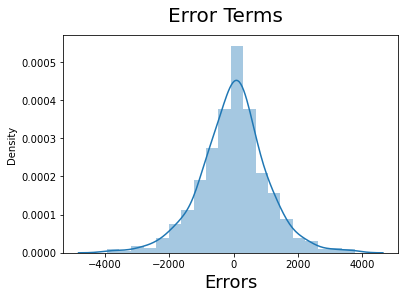

In [23]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_reg - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

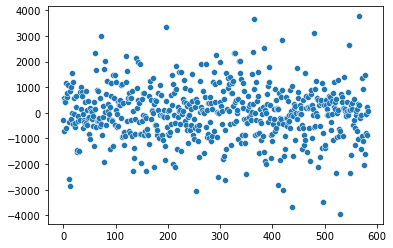

In [24]:
#look for patterns in residuals
X_train_reg = x_train_reg.reset_index()
sns.scatterplot(X_train_reg.index,y_train_reg - y_train_cnt)
plt.show()

In [25]:
# As we can see treating the data as timeseries and using earlier day registered alone 
#results in good simple linear regression model
#However lets go ahead and perform multiple linear regression

In [26]:
y_train = pd_bike_train.pop('cnt')
x_train = pd_bike_train

In [27]:
x_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,season_2,...,mnth_12,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,weathersit_1,weathersit_2,weathersit_3
366,1,0.0,1.0,0.266546,12.61520,0.392928,0.617769,244,0.243575,0,...,0,0,1,0,0,0,0,1,0,0
328,0,0.0,0.0,0.393589,19.03355,0.663375,0.121661,1095,0.242131,0,...,0,0,0,0,0,0,1,1,0,0
44,0,0.0,1.0,0.443431,19.91750,0.387290,0.807474,208,0.243286,0,...,0,0,1,0,0,0,0,1,0,0
591,1,0.0,1.0,0.806862,32.70185,0.638471,0.274029,1198,0.884926,0,...,0,0,0,0,1,0,0,1,0,0
545,1,0.0,0.0,0.879548,34.37540,0.619579,0.255325,1455,0.608143,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0.0,1.0,0.863973,35.35440,0.679690,0.187140,983,0.903552,0,...,0,0,0,0,0,1,0,1,0,0
53,0,0.0,1.0,0.202618,12.28585,0.435939,0.111379,139,0.253826,0,...,0,0,0,0,1,0,0,1,0,0
350,0,0.0,0.0,0.248216,12.46855,0.577930,0.431816,275,0.352873,0,...,1,0,0,0,0,0,0,0,1,0
79,0,0.0,1.0,0.462664,20.48675,0.759870,0.529881,401,0.239099,1,...,0,0,1,0,0,0,0,0,1,0


In [28]:
# first build model with all variables
x_train_lm = sm.add_constant(x_train)
lr_all = sm.OLS(y_train_reg,x_train_lm).fit()
lr_all.params

const            283.347644
yr              1132.802338
holiday         -175.143358
workingday       100.525319
temp            1164.832877
atemp            -58.005566
hum              908.644310
windspeed       -233.759974
casual             0.050978
registered      4116.933005
season_2         351.669446
season_3         672.327292
season_4         778.600898
mnth_2           347.657469
mnth_3           907.227590
mnth_4          1141.165714
mnth_5          1658.467753
mnth_6          2006.938077
mnth_7          1763.045122
mnth_8          1558.716320
mnth_9          1586.507642
mnth_10         1151.785564
mnth_11          247.803649
mnth_12            2.392956
weekday_1.0      275.694514
weekday_2.0      -49.251959
weekday_3.0     -126.194970
weekday_4.0      -89.011973
weekday_5.0      -85.853651
weekday_6.0      -29.249603
weathersit_1     186.612084
weathersit_2     124.096737
weathersit_3     -27.361177
dtype: float64

In [29]:
lr_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     81.52
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.24e-181
Time:                        22:39:22   Log-Likelihood:                -4745.9
No. Observations:                 583   AIC:                             9554.
Df Residuals:                     552   BIC:                             9689.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          283.3476    265.687      1.066      0.287    -238.533     805.228
yr            1132.8023    123.492      9.173      0.000     890.231    1375.373
holiday       -175.1434    198.017     -0.884      0.377    -564.102     213.815
workingday     100.5253    108.933      0.923      0.357    -113.448     314.498
temp          1164.8329   1341.326      0.868      0.386   -1469.895    3799.561
atemp          -58.0056     34.506     -1.681      0.093    -125.786       9.774
hum            908.6443    360.879      2.518      0.012     199.781    1617.508
windspeed     -233.7600    249.123     -0.938      0.348    -723.105     255.585
casual           0.0510      0.106      0.480      0.632      -0.158       0.260
registered    4116.9330    407.684     10.098      0.000    3316.132    4917.734
season_2       351.6694    221.354      1.589      0.113     -83.130     786.469
season_3       672.3273    267.904      2.510      0.012     146.091    1198.563
season_4       778.6009    244.229      3.188      0.002     298.869    1258.333
mnth_2         347.6575    180.554      1.926      0.055      -7.000     702.315
mnth_3         907.2276    204.317      4.440      0.000     505.894    1308.561
mnth_4        1141.1657    308.237      3.702      0.000     535.704    1746.627
mnth_5        1658.4678    330.262      5.022      0.000    1009.744    2307.191
mnth_6        2006.9381    349.854      5.737      0.000    1319.731    2694.145
mnth_7        1763.0451    390.010      4.521      0.000     996.961    2529.130
mnth_8        1558.7163    373.976      4.168      0.000     824.127    2293.306
mnth_9        1586.5076    335.034      4.735      0.000     928.410    2244.606
mnth_10       1151.7856    304.433      3.783      0.000     553.797    1749.774
mnth_11        247.8036    290.350      0.853      0.394    -322.523     818.131
mnth_12          2.3930    229.782      0.010      0.992    -448.961     453.747
weekday_1.0    275.6945    107.649      2.561      0.011      64.243     487.146
weekday_2.0    -49.2520    100.074     -0.492      0.623    -245.824     147.320
weekday_3.0   -126.1950    107.851     -1.170      0.242    -338.043      85.653
weekday_4.0    -89.0120    104.448     -0.852      0.394    -294.177     116.153
weekday_5.0    -85.8537    110.088     -0.780      0.436    -302.096     130.389
weekday_6.0    -29.2496    165.402     -0.177      0.860    -354.144     295.645
weathersit_1   186.6121    106.581      1.751      0.081     -22.742     395.966
weathersit_2   124.0967    119.534      1.038      0.300    -110.701     358.895
weathersit_3   -27.3612    214.719     -0.127      0.899    -449.127     394.405
==============================================================================
Omnibus:                      103.710   Durbin-Watson:                   2.020
Prob(Omni

In [30]:
# Find VIF since we have a model with all variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,weekday_5.0,inf
24,weekday_2.0,inf
25,weekday_3.0,inf
1,holiday,inf
26,weekday_4.0,inf
23,weekday_1.0,inf
2,workingday,inf
3,temp,73.57
4,atemp,61.92
29,weathersit_1,53.29


In [32]:
#As we see many variables have high p value and many have high vif, lets use RFE to reduce number of variables and also find important one's
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
lm_rfe = LinearRegression()
lm_rfe.fit(x_train,y_train)
rfe = RFE(lm_rfe,19)
rfe=rfe.fit(x_train,y_train)

In [34]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', False, 2),
 ('casual', False, 14),
 ('registered', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', True, 1),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', True, 1),
 ('mnth_12', False, 13),
 ('weekday_1.0', True, 1),
 ('weekday_2.0', False, 9),
 ('weekday_3.0', False, 5),
 ('weekday_4.0', False, 6),
 ('weekday_5.0', False, 7),
 ('weekday_6.0', False, 10),
 ('weathersit_1', False, 4),
 ('weathersit_2', False, 12),
 ('weathersit_3', False, 3)]

In [35]:
# We know that there is correlation between seasons and months however lets go by RFE and see what plays out to be important

In [36]:
#Lets build one model considering rfe features 
x_train_rfe = x_train[x_train.columns[rfe.support_]]
x_train_rfe_lm = sm.add_constant(x_train_rfe)
lr_rfe = sm.OLS(y_train, x_train_rfe_lm).fit()
lr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     129.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.27e-191
Time:                        22:39:22   Log-Likelihood:                -4748.6
No. Observations:                 583   AIC:                             9537.
Df Residuals:                     563   BIC:                             9625.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         195.0386    222.277      0.877      0.381    -241.555     631.632
yr           1120.2838    107.773     10.395      0.000     908.597    1331.970
holiday      -237.9626    216.890     -1.097      0.273    -663.975     188.049
temp         -895.4388    419.289     -2.136      0.033   -1719.001     -71.877
hum           753.6053    278.870      2.702      0.007     205.853    1301.357
registered   4235.1345    324.537     13.050      0.000    3597.684    4872.585
season_2      352.8557    213.824      1.650      0.099     -67.134     772.845
season_3      678.8780    251.098      2.704      0.007     185.675    1172.081
season_4      757.9587    188.426      4.023      0.000     387.854    1128.063
mnth_2        321.7653    165.673      1.942      0.053      -3.648     647.179
mnth_3        886.5555    180.339      4.916      0.000     532.337    1240.774
mnth_4       1107.0879    280.029      3.953      0.000     557.059    1657.117
mnth_5       1665.8661    300.698      5.540      0.000    1075.239    2256.493
mnth_6       2036.7795    311.027      6.549      0.000    1425.864    2647.695
mnth_7       1788.0191    339.657      5.264      0.000    1120.869    2455.169
mnth_8       1612.3278    321.734      5.011      0.000     980.382    2244.274
mnth_9       1606.5248    269.065      5.971      0.000    1078.030    2135.020
mnth_10      1153.5894    196.186      5.880      0.000     768.243    1538.936
mnth_11       247.0044    188.539      1.310      0.191    -123.322     617.330
weekday_1.0   418.5767    109.686      3.816      0.000     203.133     634.020
==============================================================================
Omnibus:                      101.745   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.740
Skew:                          -0.909   Prob(JB):                     1.18e-53
Kurtosis:                       5.593   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,47.58
4,registered,24.53
6,season_3,13.04
3,hum,11.58
5,season_2,9.03
14,mnth_8,7.53
13,mnth_7,7.17
7,season_4,7.14
11,mnth_5,6.63
12,mnth_6,6.04


In [38]:
#temp has high VIF , lets drop
x_train_rfe2 = x_train_rfe.drop('temp', axis=1)
x_train_rfe2_lm = sm.add_constant(x_train_rfe2)
lr_rfe2 = sm.OLS(y_train, x_train_rfe2_lm).fit()
lr_rfe2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     135.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.83e-191
Time:                        22:39:22   Log-Likelihood:                -4751.0
No. Observations:                 583   AIC:                             9540.
Df Residuals:                     564   BIC:                             9623.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         126.2891    220.626      0.572      0.567    -307.061     559.639
yr           1156.3191    106.779     10.829      0.000     946.585    1366.053
holiday      -284.2780    216.483     -1.313      0.190    -709.489     140.933
hum           594.3567    269.562      2.205      0.028      64.888    1123.825
registered   4007.1869    307.448     13.034      0.000    3403.304    4611.070
season_2      372.7092    214.295      1.739      0.083     -48.204     793.622
season_3      606.3237    249.573      2.429      0.015     116.117    1096.530
season_4      736.3440    188.747      3.901      0.000     365.611    1107.077
mnth_2        279.4152    165.001      1.693      0.091     -44.676     603.506
mnth_3        758.2037    170.565      4.445      0.000     423.183    1093.224
mnth_4        899.0509    263.367      3.414      0.001     381.751    1416.350
mnth_5       1353.9304    263.668      5.135      0.000     836.039    1871.821
mnth_6       1650.3403    253.770      6.503      0.000    1151.891    2148.789
mnth_7       1381.2038    282.098      4.896      0.000     827.113    1935.295
mnth_8       1272.4798    280.505      4.536      0.000     721.518    1823.441
mnth_9       1363.1983    244.519      5.575      0.000     882.919    1843.478
mnth_10      1006.2683    184.237      5.462      0.000     644.394    1368.143
mnth_11       200.4328    187.864      1.067      0.286    -168.566     569.431
weekday_1.0   408.4612    109.929      3.716      0.000     192.541     624.381
==============================================================================
Omnibus:                      111.531   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.432
Skew:                          -0.980   Prob(JB):                     1.55e-60
Kurtosis:                       5.738   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe2.values, i) for i in range(x_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,registered,20.39
5,season_3,12.80
4,season_2,9.00
2,hum,7.52
6,season_4,7.12
13,mnth_8,5.74
10,mnth_5,5.08
12,mnth_7,4.94
0,yr,4.58
11,mnth_6,3.98


In [40]:
#registered seems to have high VIF, lets try dropping it and see if multicollinearity is reduced 
#and if it can help us find multicollinearity among other variables
x_train_rfe3 = x_train_rfe2.drop('registered', axis=1)
x_train_rfe3_lm = sm.add_constant(x_train_rfe3)
lr_rfe3 = sm.OLS(y_train, x_train_rfe3_lm).fit()
lr_rfe3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     103.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.76e-160
Time:                        22:39:23   Log-Likelihood:                -4827.7
No. Observations:                 583   AIC:                             9691.
Df Residuals:                     565   BIC:                             9770.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1361.6795    227.059      5.997      0.000     915.697    1807.663
yr           2194.6059     81.037     27.081      0.000    2035.435    2353.777
holiday      -378.4264    246.586     -1.535      0.125    -862.765     105.912
hum          -341.1404    296.127     -1.152      0.250    -922.785     240.504
season_2      753.1743    241.954      3.113      0.002     277.936    1228.413
season_3     1151.6939    280.410      4.107      0.000     600.920    1702.468
season_4     1844.8289    192.039      9.607      0.000    1467.632    2222.026
mnth_2        480.1013    187.229      2.564      0.011     112.351     847.852
mnth_3       1202.0743    190.478      6.311      0.000     827.944    1576.205
mnth_4       1350.3658    297.551      4.538      0.000     765.924    1934.808
mnth_5       2369.8577    287.069      8.255      0.000    1806.004    2933.711
mnth_6       2636.8253    276.056      9.552      0.000    2094.604    3179.047
mnth_7       2202.3283    313.385      7.028      0.000    1586.787    2817.870
mnth_8       2244.8085    308.176      7.284      0.000    1639.498    2850.119
mnth_9       2326.4765    265.642      8.758      0.000    1804.710    2848.243
mnth_10      1294.0788    208.460      6.208      0.000     884.628    1703.530
mnth_11       162.7852    214.082      0.760      0.447    -257.708     583.279
weekday_1.0   -45.9267    118.818     -0.387      0.699    -279.305     187.452
==============================================================================
Omnibus:                      109.682   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.240
Skew:                          -0.933   Prob(JB):                     4.70e-65
Kurtosis:                       5.952   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#p value for humidity has risen a lot, lets drop it R sq and Adjusted R sq reduced though still good, we may add registered variable again
x_train_rfe4 = x_train_rfe3.drop('hum', axis=1)
x_train_rfe4_lm = sm.add_constant(x_train_rfe4)
lr_rfe4 = sm.OLS(y_train, x_train_rfe4_lm).fit()
lr_rfe4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     109.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.19e-161
Time:                        22:39:23   Log-Likelihood:                -4828.4
No. Observations:                 583   AIC:                             9691.
Df Residuals:                     566   BIC:                             9765.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1142.9728    124.589      9.174      0.000     898.260    1387.685
yr           2203.9776     80.651     27.327      0.000    2045.565    2362.390
holiday      -383.4132    246.620     -1.555      0.121    -867.815     100.988
season_2      723.7007    240.667      3.007      0.003     250.992    1196.409
season_3     1136.2117    280.169      4.055      0.000     585.914    1686.510
season_4     1823.6177    191.209      9.537      0.000    1448.052    2199.184
mnth_2        495.7056    186.793      2.654      0.008     128.814     862.597
mnth_3       1223.9864    189.580      6.456      0.000     851.620    1596.353
mnth_4       1394.2307    295.190      4.723      0.000     814.429    1974.033
mnth_5       2370.4591    287.152      8.255      0.000    1806.446    2934.472
mnth_6       2670.5353    274.580      9.726      0.000    2131.215    3209.856
mnth_7       2221.7135    313.023      7.098      0.000    1606.885    2836.542
mnth_8       2244.9603    308.265      7.283      0.000    1639.478    2850.443
mnth_9       2312.2840    265.433      8.711      0.000    1790.930    2833.638
mnth_10      1285.7268    208.394      6.170      0.000     876.407    1695.047
mnth_11       175.8824    213.841      0.822      0.411    -244.137     595.902
weekday_1.0   -49.5047    118.811     -0.417      0.677    -282.870     183.860
==============================================================================
Omnibus:                      114.895   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.885
Skew:                          -0.974   Prob(JB):                     1.88e-68
Kurtosis:                       6.007   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe4.values, i) for i in range(x_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_3,11.79
2,season_2,8.67
11,mnth_8,5.23
10,mnth_7,4.59
8,mnth_5,4.27
4,season_4,4.11
7,mnth_4,3.61
12,mnth_9,3.45
9,mnth_6,3.38
13,mnth_10,2.39


In [43]:
#drop season 3 s it has high VIF
x_train_rfe5 = x_train_rfe4.drop('season_3', axis=1)
x_train_rfe5_lm = sm.add_constant(x_train_rfe5)
lr_rfe5 = sm.OLS(y_train, x_train_rfe5_lm).fit()
lr_rfe5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     112.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          9.17e-159
Time:                        22:39:23   Log-Likelihood:                -4836.8
No. Observations:                 583   AIC:                             9706.
Df Residuals:                     567   BIC:                             9775.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1256.8343    123.026     10.216      0.000    1015.191    1498.477
yr           2196.3672     81.720     26.877      0.000    2035.856    2356.879
holiday      -384.7107    249.956     -1.539      0.124    -875.664     106.243
season_2      206.2088    206.814      0.997      0.319    -200.006     612.423
season_4     1501.6244    176.299      8.518      0.000    1155.346    1847.903
mnth_2        387.3512    187.373      2.067      0.039      19.321     755.382
mnth_3       1297.2084    191.272      6.782      0.000     921.520    1672.896
mnth_4       1803.7161    281.137      6.416      0.000    1251.519    2355.914
mnth_5       2779.4062    272.501     10.200      0.000    2244.171    3314.641
mnth_6       3300.0498    229.557     14.376      0.000    2849.164    3750.936
mnth_7       3249.7263    186.133     17.459      0.000    2884.132    3615.320
mnth_8       3272.6438    177.907     18.395      0.000    2923.206    3622.081
mnth_9       3132.2281    174.305     17.970      0.000    2789.866    3474.591
mnth_10      1498.9326    204.382      7.334      0.000    1097.494    1900.371
mnth_11       389.7685    210.040      1.856      0.064     -22.782     802.319
weekday_1.0   -59.8315    120.391     -0.497      0.619    -296.299     176.636
==============================================================================
Omnibus:                      109.177   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.795
Skew:                          -0.936   Prob(JB):                     1.95e-63
Kurtosis:                       5.896   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# p value of season_2 is now too high , lets drop
x_train_rfe6 = x_train_rfe5.drop('season_2', axis=1)
x_train_rfe6_lm = sm.add_constant(x_train_rfe6)
lr_rfe6 = sm.OLS(y_train, x_train_rfe6_lm).fit()
lr_rfe6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     120.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.34e-159
Time:                        22:39:23   Log-Likelihood:                -4837.3
No. Observations:                 583   AIC:                             9705.
Df Residuals:                     568   BIC:                             9770.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1256.4255    123.025     10.213      0.000    1014.786    1498.065
yr           2196.9479     81.718     26.885      0.000    2036.442    2357.454
holiday      -385.4414    249.954     -1.542      0.124    -876.388     105.505
season_4     1501.5225    176.298      8.517      0.000    1155.247    1847.798
mnth_2        387.3102    187.372      2.067      0.039      19.283     755.337
mnth_3       1369.7356    176.900      7.743      0.000    1022.278    1717.193
mnth_4       2009.8463    190.522     10.549      0.000    1635.634    2384.059
mnth_5       2985.5700    177.492     16.821      0.000    2636.949    3334.191
mnth_6       3432.8237    186.985     18.359      0.000    3065.556    3800.091
mnth_7       3249.6836    186.132     17.459      0.000    2884.093    3615.274
mnth_8       3272.5978    177.906     18.395      0.000    2923.164    3622.032
mnth_9       3132.2172    174.304     17.970      0.000    2789.858    3474.577
mnth_10      1499.0152    204.381      7.334      0.000    1097.581    1900.450
mnth_11       389.8388    210.038      1.856      0.064     -22.708     802.386
weekday_1.0   -58.6205    120.385     -0.487      0.626    -295.074     177.833
==============================================================================
Omnibus:                      108.446   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.516
Skew:                          -0.927   Prob(JB):                     1.36e-63
Kurtosis:                       5.913   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# p value of holiday is consistently high , lets drop ,
#ideally we should first drop weekday_1 with highest p value 
#however looking at government schedule, we know that number of holidays is lesser than 1st weekday in given year, so lets drop it first
x_train_rfe7 = x_train_rfe6.drop('holiday', axis=1)
x_train_rfe7_lm = sm.add_constant(x_train_rfe7)
lr_rfe7 = sm.OLS(y_train, x_train_rfe7_lm).fit()
lr_rfe7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     129.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.76e-160
Time:                        22:39:23   Log-Likelihood:                -4838.5
No. Observations:                 583   AIC:                             9705.
Df Residuals:                     569   BIC:                             9766.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1236.9995    122.526     10.096      0.000     996.340    1477.659
yr           2195.7435     81.813     26.839      0.000    2035.051    2356.436
season_4     1529.8378    175.551      8.714      0.000    1185.031    1874.645
mnth_2        398.4459    187.460      2.126      0.034      30.249     766.643
mnth_3       1396.7713    176.242      7.925      0.000    1050.607    1742.935
mnth_4       2028.5305    190.366     10.656      0.000    1654.625    2402.436
mnth_5       3006.5000    177.186     16.968      0.000    2658.481    3354.519
mnth_6       3462.5330    186.215     18.594      0.000    3096.780    3828.286
mnth_7       3259.8786    186.240     17.504      0.000    2894.078    3625.680
mnth_8       3298.8220    177.306     18.605      0.000    2950.568    3647.076
mnth_9       3136.7038    174.491     17.976      0.000    2793.979    3479.429
mnth_10      1490.5929    204.555      7.287      0.000    1088.817    1892.368
mnth_11       357.9917    209.274      1.711      0.088     -53.051     769.035
weekday_1.0  -112.8505    115.273     -0.979      0.328    -339.262     113.561
==============================================================================
Omnibus:                      110.384   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.982
Skew:                          -0.947   Prob(JB):                     6.52e-64
Kurtosis:                       5.897   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# p value of weekday_1 is still high , lets drop
x_train_rfe8 = x_train_rfe7.drop('weekday_1.0', axis=1)
x_train_rfe8_lm = sm.add_constant(x_train_rfe8)
lr_rfe8 = sm.OLS(y_train, x_train_rfe8_lm).fit()
lr_rfe8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     139.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.00e-161
Time:                        22:39:23   Log-Likelihood:                -4839.0
No. Observations:                 583   AIC:                             9704.
Df Residuals:                     570   BIC:                             9761.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1218.5844    121.069     10.065      0.000     980.788    1456.381
yr          2198.9155     81.746     26.899      0.000    2038.356    2359.475
season_4    1526.7706    175.517      8.699      0.000    1182.032    1871.509
mnth_2       397.3215    187.449      2.120      0.034      29.146     765.497
mnth_3      1399.0304    176.220      7.939      0.000    1052.910    1745.151
mnth_4      2029.0115    190.358     10.659      0.000    1655.122    2402.901
mnth_5      3006.3250    177.180     16.968      0.000    2658.320    3354.330
mnth_6      3459.1940    186.177     18.580      0.000    3093.517    3824.871
mnth_7      3261.4848    186.226     17.514      0.000    2895.713    3627.257
mnth_8      3302.7260    177.254     18.633      0.000    2954.574    3650.878
mnth_9      3137.4748    174.483     17.982      0.000    2794.767    3480.182
mnth_10     1495.3587    204.490      7.313      0.000    1093.713    1897.004
mnth_11      358.6456    209.265      1.714      0.087     -52.379     769.670
==============================================================================
Omnibus:                      108.784   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.985
Skew:                          -0.935   Prob(JB):                     7.93e-63
Kurtosis:                       5.877   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# p value of mnth_2 is slightly high and also we have seen in univariate analysis that this has comparatively lesser count, lets drop
x_train_rfe9 = x_train_rfe8.drop('mnth_2', axis=1)
x_train_rfe9_lm = sm.add_constant(x_train_rfe9)
lr_rfe9 = sm.OLS(y_train, x_train_rfe9_lm).fit()
lr_rfe9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     151.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.67e-161
Time:                        22:39:23   Log-Likelihood:                -4841.3
No. Observations:                 583   AIC:                             9707.
Df Residuals:                     571   BIC:                             9759.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1366.0473     99.387     13.745      0.000    1170.838    1561.256
yr          2200.1302     81.993     26.833      0.000    2039.085    2361.176
season_4    1409.4931    167.076      8.436      0.000    1081.334    1737.652
mnth_3      1250.9826    162.281      7.709      0.000     932.242    1569.723
mnth_4      1880.8545    177.602     10.590      0.000    1532.022    2229.687
mnth_5      2858.2662    163.327     17.500      0.000    2537.471    3179.061
mnth_6      3311.0832    173.094     19.129      0.000    2971.105    3651.062
mnth_7      3113.3470    173.141     17.982      0.000    2773.276    3453.418
mnth_8      3154.5984    163.394     19.307      0.000    2833.671    3475.526
mnth_9      3019.3348    165.846     18.206      0.000    2693.592    3345.077
mnth_10     1464.5893    204.597      7.158      0.000    1062.735    1866.443
mnth_11      327.8399    209.397      1.566      0.118     -83.443     739.122
==============================================================================
Omnibus:                      109.648   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.685
Skew:                          -0.949   Prob(JB):                     4.13e-62
Kurtosis:                       5.835   Cond. No.                         8.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe9.values, i) for i in range(x_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,season_4,3.52
9,mnth_10,2.21
10,mnth_11,2.10
0,yr,1.72
8,mnth_9,1.12
7,mnth_8,1.09
3,mnth_4,1.08
6,mnth_7,1.08
2,mnth_3,1.07
4,mnth_5,1.07


In [49]:
# p value of mnth_11 is high
x_train_rfe10 = x_train_rfe9.drop('mnth_11', axis=1)
x_train_rfe10_lm = sm.add_constant(x_train_rfe10)
lr_rfe10 = sm.OLS(y_train, x_train_rfe10_lm).fit()
lr_rfe10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     165.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          9.38e-162
Time:                        22:39:23   Log-Likelihood:                -4842.5
No. Observations:                 583   AIC:                             9707.
Df Residuals:                     572   BIC:                             9755.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1379.0942     99.163     13.907      0.000    1184.327    1573.862
yr          2199.7492     82.097     26.794      0.000    2038.501    2360.998
season_4    1569.2467    132.466     11.846      0.000    1309.068    1829.426
mnth_3      1238.1191    162.279      7.630      0.000     919.385    1556.854
mnth_4      1868.0253    177.637     10.516      0.000    1519.124    2216.927
mnth_5      2845.4062    163.327     17.422      0.000    2524.612    3166.200
mnth_6      3298.2395    173.119     19.052      0.000    2958.214    3638.265
mnth_7      3100.5118    173.166     17.905      0.000    2760.393    3440.630
mnth_8      3141.7600    163.395     19.228      0.000    2820.832    3462.688
mnth_9      2965.6942    162.474     18.253      0.000    2646.575    3284.813
mnth_10     1291.9719    172.567      7.487      0.000     953.030    1630.914
==============================================================================
Omnibus:                      107.396   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.583
Skew:                          -0.935   Prob(JB):                     3.91e-60
Kurtosis:                       5.787   Cond. No.                         8.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe9.values, i) for i in range(x_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,season_4,3.52
9,mnth_10,2.21
0,yr,1.72
8,mnth_9,1.12
7,mnth_8,1.09
3,mnth_4,1.08
6,mnth_7,1.08
2,mnth_3,1.07
4,mnth_5,1.07
5,mnth_6,1.07


In [51]:
#Now everything seems to be in place, lets add 'registered' back again and see
selected_cols = ['registered','season_4','yr','mnth_10','mnth_8','mnth_3','mnth_5','mnth_7','mnth_4','mnth_6','mnth_9']
x_train_select = x_train_rfe[selected_cols]
x_train_select_lm = sm.add_constant(x_train_select)
lr_select = sm.OLS(y_train, x_train_select_lm).fit()
lr_select.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     211.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.38e-193
Time:                        22:39:23   Log-Likelihood:                -4766.1
No. Observations:                 583   AIC:                             9556.
Df Residuals:                     571   BIC:                             9609.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        760.1169     99.079      7.672      0.000     565.513     954.720
registered  3667.5874    280.317     13.084      0.000    3117.010    4218.165
season_4     763.4989    131.591      5.802      0.000     505.037    1021.961
yr          1216.2367    104.140     11.679      0.000    1011.693    1420.780
mnth_10      994.9160    153.187      6.495      0.000     694.037    1295.795
mnth_8      1881.7697    172.772     10.892      0.000    1542.423    2221.116
mnth_3       777.3249    146.752      5.297      0.000     489.085    1065.565
mnth_5      1747.7755    166.123     10.521      0.000    1421.488    2074.063
mnth_7      1943.6561    175.865     11.052      0.000    1598.235    2289.077
mnth_4      1176.4083    164.662      7.144      0.000     852.990    1499.826
mnth_6      2088.2617    177.905     11.738      0.000    1738.833    2437.691
mnth_9      1846.8192    166.307     11.105      0.000    1520.172    2173.466
==============================================================================
Omnibus:                       99.416   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.592
Skew:                          -0.906   Prob(JB):                     3.79e-50
Kurtosis:                       5.467   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = x_train_select.columns
vif['VIF'] = [variance_inflation_factor(x_train_select.values, i) for i in range(x_train_select.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,registered,15.43
2,yr,4.26
1,season_4,3.18
4,mnth_8,2.08
6,mnth_5,1.90
9,mnth_6,1.87
7,mnth_7,1.82
10,mnth_9,1.72
3,mnth_10,1.62
8,mnth_4,1.44


In [53]:
#There is good improvement in Rsq and Ajusted Rsq  and resgistered has high vif,
#Maybe we can try dropping yr col as it has only 2 vals and next high vif
selected_cols2 = ['registered','season_4','mnth_10','mnth_8','mnth_3','mnth_5','mnth_7','mnth_4','mnth_6','mnth_9']
x_train_select2 = x_train_rfe[selected_cols2]
x_train_select2_lm = sm.add_constant(x_train_select2)
lr_select2 = sm.OLS(y_train, x_train_select2_lm).fit()
lr_select2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.09e-167
Time:                        22:39:23   Log-Likelihood:                -4828.5
No. Observations:                 583   AIC:                             9679.
Df Residuals:                     572   BIC:                             9727.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        646.5183    109.651      5.896      0.000     431.151     861.885
registered  6030.6912    215.743     27.953      0.000    5606.947    6454.436
season_4     258.6746    138.219      1.871      0.062     -12.803     530.153
mnth_10      784.0259    169.168      4.635      0.000     451.760    1116.292
mnth_8      1103.4577    177.267      6.225      0.000     755.285    1451.631
mnth_3       475.6858    160.652      2.961      0.003     160.146     791.225
mnth_5      1041.1014    172.050      6.051      0.000     703.174    1379.029
mnth_7      1236.6810    183.624      6.735      0.000     876.022    1597.340
mnth_4       778.4430    179.153      4.345      0.000     426.565    1130.321
mnth_6      1334.1136    184.351      7.237      0.000     972.025    1696.202
mnth_9      1134.4894    172.058      6.594      0.000     796.547    1472.432
==============================================================================
Omnibus:                       34.429   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.334
Skew:                          -0.281   Prob(JB):                     2.95e-19
Kurtosis:                       4.788   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
vif['Features'] = x_train_select2.columns
vif['VIF'] = [variance_inflation_factor(x_train_select2.values, i) for i in range(x_train_select2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,registered,6.23
1,season_4,2.77
3,mnth_8,1.75
5,mnth_5,1.62
2,mnth_10,1.60
8,mnth_6,1.60
6,mnth_7,1.59
9,mnth_9,1.48
7,mnth_4,1.36
4,mnth_3,1.31


In [55]:
#drop season 4 with high p
selected_cols3 = ['registered','mnth_10','mnth_8','mnth_3','mnth_5','mnth_7','mnth_4','mnth_6','mnth_9']
x_train_select3 = x_train_rfe[selected_cols3]
x_train_select3_lm = sm.add_constant(x_train_select3)
lr_select3 = sm.OLS(y_train, x_train_select3_lm).fit()
lr_select3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     195.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.31e-168
Time:                        22:39:23   Log-Likelihood:                -4830.3
No. Observations:                 583   AIC:                             9681.
Df Residuals:                     573   BIC:                             9724.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        699.2375    106.202      6.584      0.000     490.646     907.829
registered  6173.3060    202.276     30.519      0.000    5776.012    6570.600
mnth_10      904.6429    156.751      5.771      0.000     596.767    1212.519
mnth_8       956.7485    159.338      6.005      0.000     643.791    1269.706
mnth_3       362.5657    149.172      2.431      0.015      69.575     655.556
mnth_5       902.8703    155.728      5.798      0.000     597.003    1208.738
mnth_7      1093.6615    167.330      6.536      0.000     765.006    1422.317
mnth_4       652.9073    166.484      3.922      0.000     325.915     979.900
mnth_6      1189.8782    167.834      7.090      0.000     860.234    1519.523
mnth_9      1052.7096    166.780      6.312      0.000     725.136    1380.284
==============================================================================
Omnibus:                       32.165   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.587
Skew:                          -0.247   Prob(JB):                     3.17e-18
Kurtosis:                       4.753   Cond. No.                         8.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = x_train_select3.columns
vif['VIF'] = [variance_inflation_factor(x_train_select3.values, i) for i in range(x_train_select3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,registered,3.62
2,mnth_8,1.43
8,mnth_9,1.39
4,mnth_5,1.36
1,mnth_10,1.35
7,mnth_6,1.35
5,mnth_7,1.34
6,mnth_4,1.21
3,mnth_3,1.18


In [57]:
#drop smonth 3 with slightly high p to further simplify
selected_cols4 = ['registered','mnth_10','mnth_8','mnth_5','mnth_7','mnth_4','mnth_6','mnth_9']
x_train_select4 = x_train_rfe[selected_cols4]
x_train_select4_lm = sm.add_constant(x_train_select4)
lr_select4 = sm.OLS(y_train, x_train_select4_lm).fit()
lr_select4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     216.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.29e-168
Time:                        22:39:23   Log-Likelihood:                -4833.3
No. Observations:                 583   AIC:                             9685.
Df Residuals:                     574   BIC:                             9724.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        771.3298    102.410      7.532      0.000     570.185     972.475
registered  6191.9658    202.993     30.503      0.000    5793.266    6590.665
mnth_10      821.3849    153.615      5.347      0.000     519.670    1123.100
mnth_8       872.3584    156.172      5.586      0.000     565.619    1179.097
mnth_5       819.5896    152.560      5.372      0.000     519.946    1119.233
mnth_7      1009.7542    164.429      6.141      0.000     686.799    1332.709
mnth_4       571.2876    163.757      3.489      0.001     249.651     892.924
mnth_6      1105.8119    164.932      6.705      0.000     781.869    1429.755
mnth_9       968.1736    163.808      5.910      0.000     646.437    1289.911
==============================================================================
Omnibus:                       30.134   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.128
Skew:                          -0.196   Prob(JB):                     6.57e-18
Kurtosis:                       4.762   Cond. No.                         8.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif = pd.DataFrame()
vif['Features'] = x_train_select4.columns
vif['VIF'] = [variance_inflation_factor(x_train_select4.values, i) for i in range(x_train_select4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,registered,3.06
2,mnth_8,1.37
7,mnth_9,1.33
1,mnth_10,1.30
3,mnth_5,1.30
6,mnth_6,1.30
4,mnth_7,1.29
5,mnth_4,1.17


In [59]:
#drop mnth_10 as it was a bit volatile as seen in initial univariate analysis
selected_cols5 = ['registered','mnth_8','mnth_5','mnth_7','mnth_4','mnth_6','mnth_9']
x_train_select5 = x_train_rfe[selected_cols5]
x_train_select5_lm = sm.add_constant(x_train_select5)
lr_select5 = sm.OLS(y_train, x_train_select5_lm).fit()
lr_select5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     232.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          3.64e-163
Time:                        22:39:23   Log-Likelihood:                -4847.5
No. Observations:                 583   AIC:                             9711.
Df Residuals:                     575   BIC:                             9746.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        791.6468    104.767      7.556      0.000     585.875     997.419
registered  6474.1013    200.663     32.264      0.000    6079.979    6868.223
mnth_8       666.1007    154.922      4.300      0.000     361.819     970.382
mnth_5       630.1042    151.905      4.148      0.000     331.747     928.461
mnth_7       810.7958    163.961      4.945      0.000     488.760    1132.831
mnth_4       406.9176    164.660      2.471      0.014      83.509     730.326
mnth_6       904.4483    164.382      5.502      0.000     581.586    1227.311
mnth_9       759.7098    162.874      4.664      0.000     439.810    1079.610
==============================================================================
Omnibus:                       25.042   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.231
Skew:                          -0.067   Prob(JB):                     2.52e-15
Kurtosis:                       4.658   Cond. No.                         7.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
vif['Features'] = x_train_select5.columns
vif['VIF'] = [variance_inflation_factor(x_train_select5.values, i) for i in range(x_train_select5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,registered,2.36
1,mnth_8,1.28
6,mnth_9,1.26
2,mnth_5,1.23
5,mnth_6,1.23
3,mnth_7,1.22
4,mnth_4,1.13


In [61]:
#drop mnth_4 as it has comparatively higher p (though acceptable) and see if it can bring skew a bit less than 5%
selected_cols6 = ['registered','mnth_8','mnth_5','mnth_7','mnth_6','mnth_9']
x_train_select6 = x_train_rfe[selected_cols6]
x_train_select6_lm = sm.add_constant(x_train_select6)
lr_select6 = sm.OLS(y_train, x_train_select6_lm).fit()
lr_select6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     268.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.41e-163
Time:                        22:39:23   Log-Likelihood:                -4850.5
No. Observations:                 583   AIC:                             9715.
Df Residuals:                     576   BIC:                             9746.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        821.8477    104.512      7.864      0.000     616.577    1027.118
registered  6519.1701    200.717     32.479      0.000    6124.945    6913.396
mnth_8       606.1972    153.691      3.944      0.000     304.335     908.059
mnth_5       572.8800    150.794      3.799      0.000     276.706     869.054
mnth_7       752.0584    162.947      4.615      0.000     432.016    1072.100
mnth_6       845.3266    163.351      5.175      0.000     524.490    1166.163
mnth_9       699.4539    161.751      4.324      0.000     381.761    1017.147
==============================================================================
Omnibus:                       20.702   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.143
Skew:                          -0.004   Prob(JB):                     1.29e-11
Kurtosis:                       4.437   Cond. No.                         6.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif = pd.DataFrame()
vif['Features'] = x_train_select6.columns
vif['VIF'] = [variance_inflation_factor(x_train_select6.values, i) for i in range(x_train_select6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,registered,2.08
1,mnth_8,1.25
5,mnth_9,1.23
2,mnth_5,1.21
3,mnth_7,1.20
4,mnth_6,1.20


Text(0.5, 0, 'Errors')

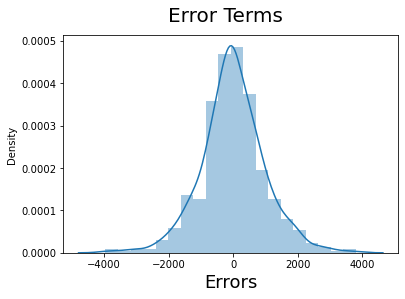

In [63]:
# lr_select6 seems to be fair model
#Lets try determining error
y_train_lr_select6 = lr_select6.predict(x_train_select6_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_lr_select6), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

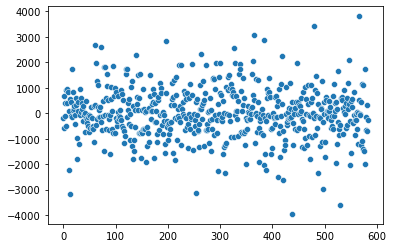

In [64]:
#look for patterns in residuals
X_train = x_train_select6.reset_index()
sns.scatterplot(X_train.index,y_train - y_train_lr_select6)
plt.show()

In [65]:
#Predictions on testing data
numeric_vars = ['temp','hum','windspeed','registered']
x_test = pd_bike_test
#only registered is numeric column in x_test
x_test[numeric_vars] = scaler.transform(x_test[numeric_vars])
y_test = pd_bike_test['cnt']
x_test = x_test[selected_cols6]
x_test_lm = sm.add_constant(x_test)

In [66]:
y_pred = lr_select6.predict(x_test_lm)

Text(0, 0.5, 'y_pred')

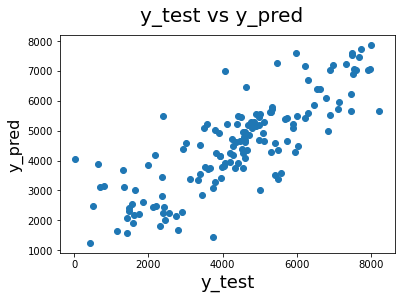

In [67]:

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6645844570197699